In [ ]:
import pandas as pd
import seaborn as sns
import folium
import glob

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False

In [ ]:
# 1. CSV 파일 목록 가져오기
file_list = glob.glob('../data/bike_rent_*.csv')
file_list.sort()  # 숫자 순서대로 정렬

print(f"총 {len(file_list)}개 파일을 찾았습니다.")
print("파일 목록:", file_list)

# 2. 각 파일 읽기 (한글 인코딩 처리 + 날짜 컬럼 변환)
df_list = [pd.read_csv(f, encoding='utf-8', parse_dates=['대여일시']) for f in file_list]

# 3. 병합 및 중복 제거
if df_list:
    df_all = pd.concat(df_list, ignore_index=True)
    print(f"병합된 총 행 수 (중복 제거 전): {df_all.shape[0]}")

    df_all.drop_duplicates(inplace=True)
    print(f"중복 제거 후 총 행 수: {df_all.shape[0]}")

    # 4. CSV 저장 (Excel 호환 인코딩)
    df_all.to_csv('bike_rent_combined.csv', index=False, encoding='utf-8-sig')
    print("CSV 파일로 저장 완료: bike_rent_combined.csv")

    # 5. 확인용 출력
    print(df_all.head())
else:
    print("CSV 파일을 찾을 수 없습니다.")

In [ ]:
bikes = df_all
bikes.info()

In [ ]:
bikes.describe()

In [ ]:
bikes.describe( include=[ 'object', 'datetime64' ] )

In [ ]:
bikes.isnull()

In [ ]:
bikes.isnull().sum()

In [ ]:
bikes.head()

In [ ]:
# 한글 요일 리스트
요일 = ['월', '화', '수', '목', '금', '토', '일']

# 날짜만 추출
bikes['일자'] = bikes['대여일시'].dt.day

# 요일 번호 (0=월 ~ 6=일)
bikes['요일번호'] = bikes['대여일시'].dt.dayofweek

# 요일 한글 이름
bikes['요일'] = bikes['요일번호'].apply(lambda x: 요일[x])

# 대여 시각 (0~23시)
bikes['대여시간대'] = bikes['대여일시'].dt.hour

# 주말 여부 (토/일이면 '주말', 그 외는 '평일')
bikes['주말여부'] = bikes['요일번호'].apply(lambda x: '주말' if x >= 5 else '평일')

print(bikes[['대여일시', '일자', '요일번호', '요일', '대여시간대', '주말여부']].head(10))

In [ ]:
bikes.info()
print(bikes['요일'].value_counts())

In [ ]:
bike_shop = pd.read_excel('../data/bike_rent_location.xlsx')
bike_shop.info()
bike_shop.head()


In [ ]:
bike_gu = bike_shop[['구분', '대여소번호', '대여소명', '위도', '경도']]
bike_gu.head(1)

In [ ]:
bikes = pd.merge(bikes, bike_gu, left_on='대여 대여소번호', right_on='대여소번호')
bikes.head(3)

In [ ]:
bikes.drop(['대여소번호', '대여소명'], axis=1, inplace=True)
bikes.head(3)

In [ ]:
bikes.rename(columns={'구분': '대여구', '위도': '대여점위도', '경도': '대여점경도'}, inplace=True)

<Axes: xlabel='요일', ylabel='count'>

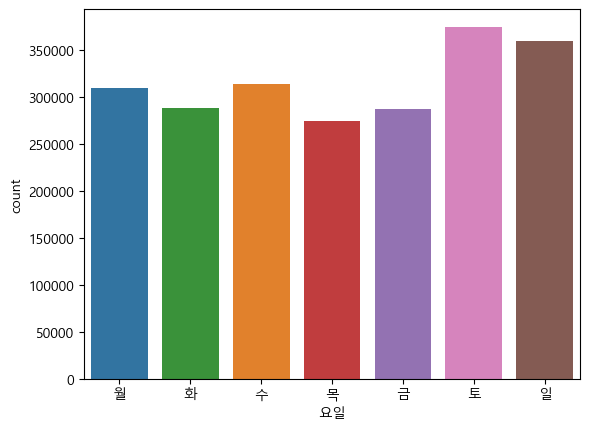

In [75]:
sns.countplot(x='요일', data=bikes, order=['월', '화', '수', '목', '금', '토', '일'], hue='요일')

<Axes: xlabel='일자', ylabel='count'>

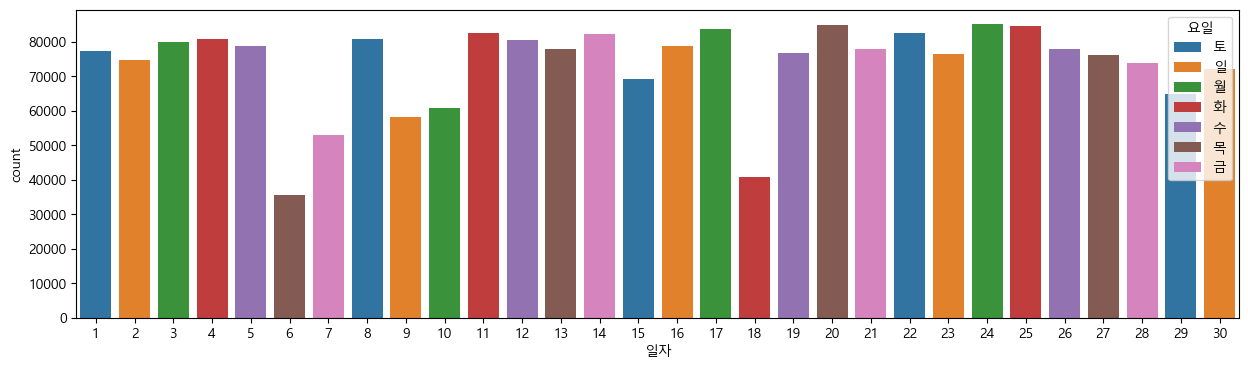

In [76]:
plt.figure(figsize=(15, 4))
sns.countplot(x='일자', data=bikes, hue='요일')

<Axes: xlabel='대여시간대', ylabel='count'>

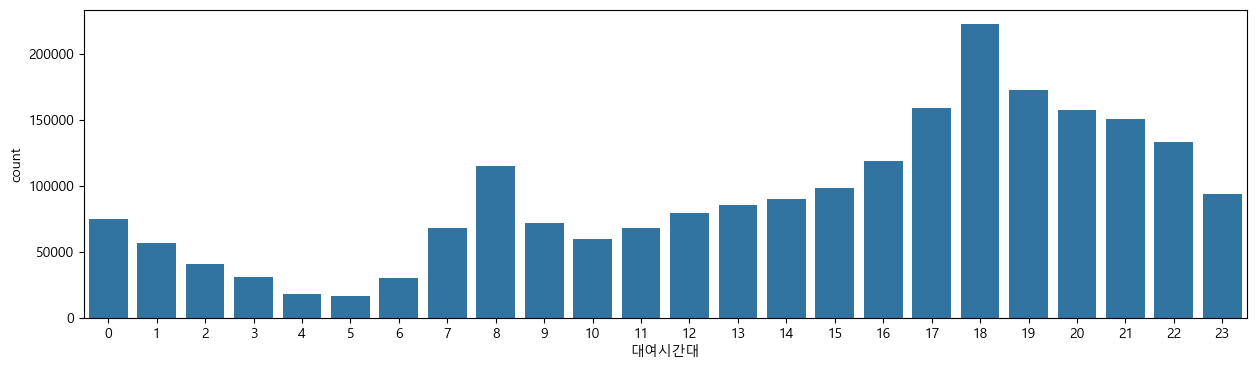

In [77]:
plt.figure(figsize=(15, 4))
sns.countplot(x='대여시간대', data=bikes)

In [ ]:
bikes.head(100)

In [81]:
hourly_dayofweek_ride = bikes.pivot_table(index='대여시간대', columns='요일', values='자전거번호', aggfunc='count')
hourly_dayofweek_ride

요일,금,목,수,월,일,토,화
대여시간대,,,,,,,
0,8353,9568,8624,7461,17025,13438,9907
1,6748,7508,7226,4846,11731,11232,7529
2,4762,5857,5328,3305,8804,8348,4497
3,3045,3992,3430,2102,8748,6221,3157
4,1979,2402,2160,1544,4076,3584,1971
5,2070,2451,2495,2069,2567,2619,2316
6,4252,4534,5393,4455,3311,3345,4633
7,10337,11324,13853,11418,4420,4869,12070
8,17164,17818,23542,18762,6651,8696,22119


<Axes: title={'center': '대여시간대 x 요일 이용건수'}, xlabel='대여시간대'>

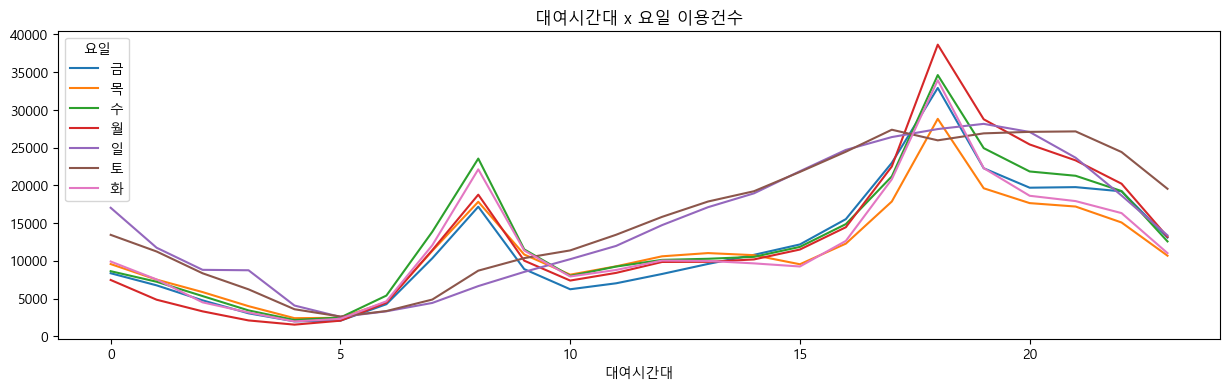

In [82]:
hourly_dayofweek_ride.plot(kind='line', title = '대여시간대 x 요일 이용건수', figsize=(15,4))

<Axes: title={'center': '대여시간대 x 요일 이용건수'}, xlabel='대여시간대'>

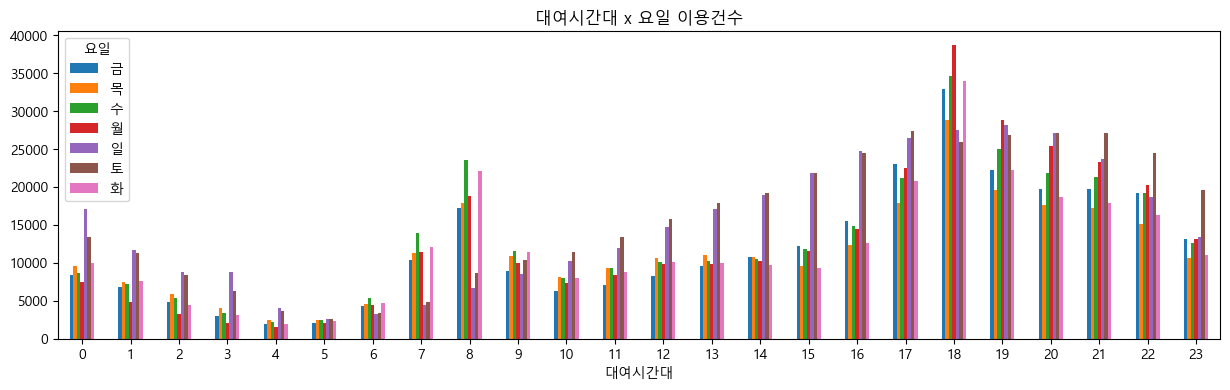

In [87]:
hourly_dayofweek_ride.plot(kind='bar', title='대여시간대 x 요일 이용건수', figsize=(15, 4), rot=0)

<Axes: xlabel='대여시간대', ylabel='count'>

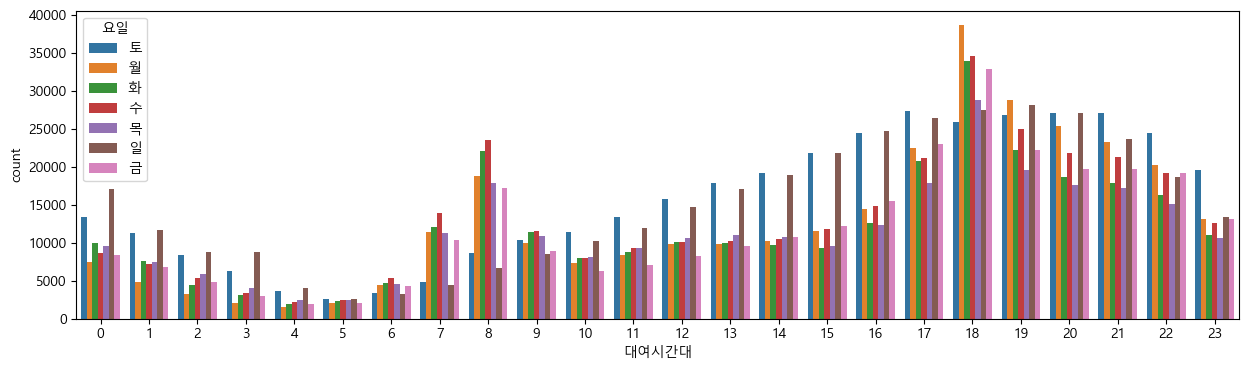

In [88]:
plt.figure(figsize=(15, 4))
sns.countplot(data=bikes, x='대여시간대', hue='요일')

<Axes: xlabel='요일', ylabel='대여시간대'>

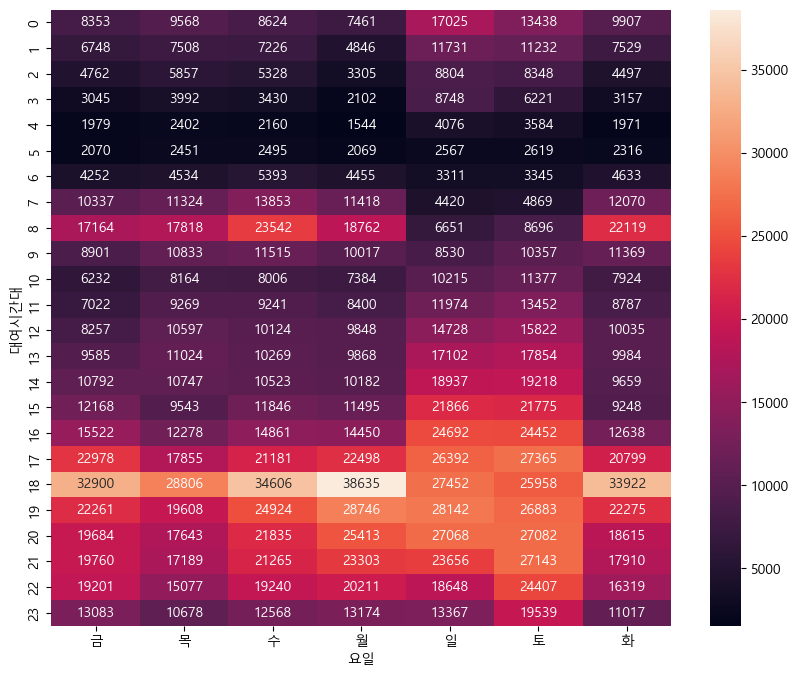

In [89]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=hourly_dayofweek_ride, annot=True, fmt='d')